In [1]:
import numpy as np
import wave
from scipy.io import wavfile
from scipy import signal
from tensorflow.keras.models import Model
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.models import model_from_json
import soundfile as sf
import os


In [2]:
with open('C:/Users/Joe/Summer/ModelWeights/Archibald.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights('C:/Users/Joe/Summer/ModelWeights/Archibald.h5')

W0624 09:41:16.446369  2600 deprecation.py:506] From c:\users\joe\summer\synthavinci\env\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 09:41:16.454365  2600 deprecation.py:506] From c:\users\joe\summer\synthavinci\env\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 09:41:16.456363  2600 deprecation.py:506] From c:\users\joe\summer\synthavinci\env\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dt

648


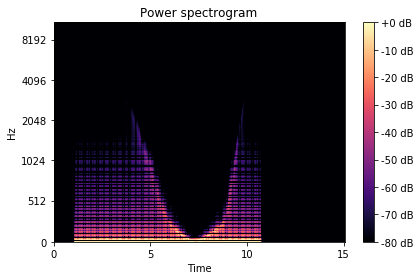

In [23]:
#audio,_ = sf.read('C:/Users/Joe/Desktop/SAW.wav')
#audio = audio[:, 0]
audio,_ = sf.read('C:/Users/Joe/Desktop/SAW.wav')

spect = np.abs(librosa.feature.melspectrogram(audio, sr=44100, n_mels=512))
librosa.display.specshow(librosa.amplitude_to_db(spect,
                        ref=np.max),
                          y_axis='mel', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

print(spect.shape[1])
spect = spect.T
outs = np.zeros((spect.shape[0], 5))

spect = np.expand_dims(spect, axis=2)
spect = np.expand_dims(spect, axis=3)
outs = model.predict(spect)

In [17]:
print(outs[60:120])

[[ 1.5168828e-01  3.5088995e-01  7.7578798e-02  1.8619573e-01
   3.4072077e-01]
 [ 1.3833332e-01  3.4173605e-01  7.4261159e-02  1.8998235e-01
   3.1947893e-01]
 [ 1.3219540e-01  3.2155284e-01  6.8585910e-02  1.8442217e-01
   2.9041767e-01]
 [ 1.2214540e-01  2.7964213e-01  6.2679186e-02  1.7593297e-01
   2.4082890e-01]
 [ 1.1426240e-01  2.5128135e-01  6.5325618e-02  1.7422721e-01
   1.5843241e-01]
 [ 1.0782108e-01  2.3065712e-01  5.3895384e-02  1.7446220e-01
   1.4006516e-01]
 [ 1.1505088e-01  1.9108599e-01  4.7398210e-02  1.6919962e-01
   1.5217555e-01]
 [ 1.0447587e-01  1.4158255e-01  6.1404273e-02  1.9262511e-01
   2.9290769e-01]
 [ 1.1422400e-01  8.3244309e-02  6.1758369e-02  2.0061487e-01
   4.5905378e-01]
 [ 1.0718340e-01  5.0673842e-02  5.3000152e-02  2.1989331e-01
   6.6307867e-01]
 [ 5.4011539e-02  1.5749749e-02  4.6657067e-02  2.2602788e-01
   5.2268666e-01]
 [ 3.4042347e-02  6.6387095e-03  7.6186270e-02  3.5643923e-01
   5.9766364e-01]
 [ 3.4747642e-02  8.3823316e-03  7.70005

In [24]:
np.savetxt("C:/Users/Joe/Summer/Archie6.csv", outs, delimiter=",")